In [2]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
# 평균 제곱 오차

def mean_squared_error(y, t) :
    return 0.5 * np.sum((y-t) ** 2)

In [ ]:
# 교차 제곱 오차

def cross_entropy_error(y, t) :
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [ ]:
# 신경망 학습 시 정확도를 지표 X 매개변수의 미분이(기울기) 거의 0이 되기 때문

In [10]:
# 수치 미분 ( 원래의 미분 식으로는 오차가 있어서 차분을 계산하는 방법 사용 )

def numerical_diff(f, x) :
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [2]:
# 0.01x^2 + 0.1x

def function_1(x) :
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()

In [11]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [4]:
def function_2(x) :
    return x[0]**2 + x[1]**2

0.1999999999990898


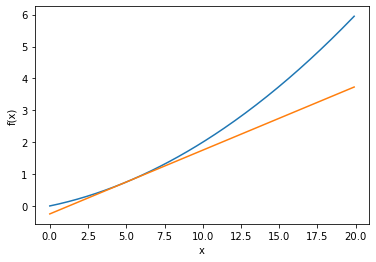

In [16]:
# 0.01x^2 + 0.1의 수치 미분 값을 기울기로 하는 직선

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x) # 원래식
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x) # 미분한 식의 접선

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [21]:
def function_tmp1(x0) :
    return x0*x0+4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1) :
    return 3.0**2.0+x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


In [6]:
def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size) :
        tmp_val = x[idx] 
        
        x[idx] = tmp_val + h # f(X + h)
        fxh1 = f(x)
        
        x[idx] = tmp_val - h # f(X - h)
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [8]:
# 경사 하강법

def gradient_descent(f, init_x, lr = 0.01, step_num = 100) :
    x = init_x
    
    for i in range(step_num) :
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))

[-2.99999994  3.99999992]
